In [73]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas import Series,DataFrame
# OPTIONAL: load the Series and DataFrame functions 


1.we use a “wide” structure similar to assignment, then do data tidying and the data wrangling transformations

In [74]:
# read contents of a csv file that we build from GitHub into a Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/Yunxng/DAV.5400/master/Rawdata.csv")
#rename the columns
df.rename(columns={'Unnamed: 0':'airlines','Unnamed: 1':'time'},inplace=True)
df

,airlines,time,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497,221,212,503,1841
1,NaN,delayed,63,12,20,102,305
2,AM WEST,on time,694,4840,383,320,201
3,NaN,delayed,117,415,65,129,61


2.combine and reshape data in Pandas to tidy and transform your data

In [75]:
#transfer the "wide" format above into 'long' format
long_df=pd.melt(df, id_vars=["airlines","time"], value_vars=["Los Angeles","Phoenix",'San Diego','San Francisco','Seattle'])
# fill all missing values in df 
long_df['airlines'].fillna(method='ffill', inplace = True)
long_df

,airlines,time,variable,value
0,ALASKA,on time,Los Angeles,497
1,ALASKA,delayed,Los Angeles,63
2,AM WEST,on time,Los Angeles,694
3,AM WEST,delayed,Los Angeles,117
4,ALASKA,on time,Phoenix,221
5,ALASKA,delayed,Phoenix,12
6,AM WEST,on time,Phoenix,4840
7,AM WEST,delayed,Phoenix,415
8,ALASKA,on time,San Diego,212
9,ALASKA,delayed,San Diego,20


3.perform analysis to compare the arrival delays for the two airlines and answer which airline had the best on time performance for each city?

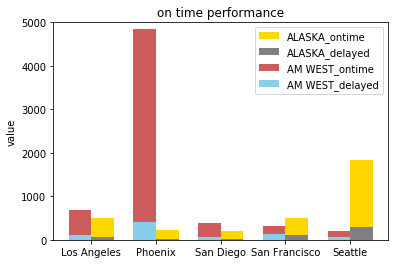

In [76]:
#input original data 
AL_ON=(long_df['value'][(long_df["airlines"]=='ALASKA') & (long_df["time"]=='on time')])

AM_ON=(long_df['value'][(long_df["airlines"]=='AM WEST') & (long_df["time"]=='on time')])

AL_DE=(long_df['value'][(long_df["airlines"]=='ALASKA') & (long_df["time"]=='delayed')])

AM_DE=(long_df['value'][(long_df["airlines"]=='AM WEST') & (long_df["time"]=='delayed')])


x =np.arange(len(AL_ON))# the x locations for the groups
width = 0.35# the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x+width/2, AL_ON, width, color='gold', label='ALASKA_ontime')

rects2 = ax.bar(x+width/2, AL_DE, width,color='grey', label='ALASKA_delayed')

rects3 = ax.bar(x-width/2, AM_ON, width,color='IndianRed', label='AM WEST_ontime')

rects4 = ax.bar(x-width/2, AM_DE, width,color='SkyBlue', label='AM WEST_delayed')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('on time performance')


plt.ylim(ymax=5000, ymin=0)
plt.xticks(x,("Los Angeles","Phoenix",'San Diego','San Francisco','Seattle'))
ax.legend()
 
plt.show()


As graphic shows above, "AM WEST" airline had the best on time performance for Los Angeles,Phoenix and San Diego; "ALASKA"had the best on time performance for San Francisco and Seattle. 

4.transform “long” data back into a “wide” format and see what changes

In [45]:
df['airlines'].fillna(method='ffill', inplace = True)
df

,airlines,time,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497,221,212,503,1841
1,ALASKA,delayed,63,12,20,102,305
2,AM WEST,on time,694,4840,383,320,201
3,AM WEST,delayed,117,415,65,129,61


now we simulate tidy long format structure to analyze which airline had the best on time performance for each city? And the soulutions are same.There is no any changes.

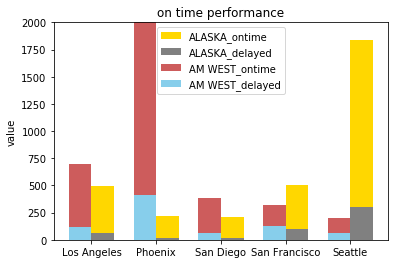

In [48]:
AL_ON=(df.iloc[0,2:])

AM_ON=(df.iloc[2,2:])

AL_DE=(df.iloc[1,2:])

AM_DE=(df.iloc[3,2:])

x =np.arange(len(AL_ON))# the x locations for the groups
width = 0.35# the width of the bars
 
fig, ax = plt.subplots()

rects1 = ax.bar(x+width/2, AL_ON, width, color='gold', label='ALASKA_ontime')

rects2 = ax.bar(x+width/2, AL_DE, width,color='grey', label='ALASKA_delayed')

rects3 = ax.bar(x-width/2, AM_ON, width,color='IndianRed', label='AM WEST_ontime')

rects4 = ax.bar(x-width/2, AM_DE, width,color='SkyBlue', label='AM WEST_delayed')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('on time performance')


plt.ylim(ymax=5000, ymin=0)
plt.xticks(x,("Los Angeles","Phoenix",'San Diego','San Francisco','Seattle'))
ax.legend()
 
plt.show()

Here we use long format to get two kinds of wide format.Both two situation can help us analyze which airline had the best on time performance each city. These “wide” presentation easier to understand and work with.

In [101]:
wide_df1=long_df.pivot_table(index=['airlines','variable'],columns='time').reset_index()
wide_df1.sort_values(by='variable')

airlines       variable   value        
time                         delayed on time
0      ALASKA    Los Angeles      63     497
5     AM WEST    Los Angeles     117     694
1      ALASKA        Phoenix      12     221
6     AM WEST        Phoenix     415    4840
2      ALASKA      San Diego      20     212
7     AM WEST      San Diego      65     383
3      ALASKA  San Francisco     102     503
8     AM WEST  San Francisco     129     320
4      ALASKA        Seattle     305    1841
9     AM WEST        Seattle      61     201

In [102]:
wide_df2=long_df.pivot_table(index=['time','variable'],columns='airlines').reset_index()
wide_df2

time       variable  value        
airlines                         ALASKA AM WEST
0         delayed    Los Angeles     63     117
1         delayed        Phoenix     12     415
2         delayed      San Diego     20      65
3         delayed  San Francisco    102     129
4         delayed        Seattle    305      61
5         on time    Los Angeles    497     694
6         on time        Phoenix    221    4840
7         on time      San Diego    212     383
8         on time  San Francisco    503     320
9         on time        Seattle   1841     201